# 🚀 Level 2.1: The Two-Layer Breakthrough

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YOUR_USERNAME/ai-mastery-from-scratch/blob/main/notebooks/phase_2_neural_network_revolution/2.1_two_layer_breakthrough.ipynb)

---

## 🎯 The Challenge: Can Two Layers Solve What One Cannot?

In this lesson, you'll build your first multi-layer neural network and see how it can solve the XOR problem—a feat impossible for a single neuron!

### What You'll Discover:
- How a hidden layer unlocks new power
- The structure of a two-layer neural network
- Visual intuition for non-linear decision boundaries
- Interactive experiments with network parameters

Let's get started!

## 🚀 Setup & Imports

*Run the cell below to set up your environment. This works in both Google Colab and local Jupyter notebooks.*

In [1]:
# 📦 Install Required Packages
!pip install numpy --quiet
!pip install matplotlib --quiet
!pip install ipywidgets --quiet

print("✅ All packages installed!")

✅ All packages installed!


In [2]:
# 🔧 Environment Check & Imports
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

plt.style.use('default')
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['font.size'] = 12

print("🎯 Environment ready!")

🎯 Environment ready!


## 🧬 Generate XOR Dataset

We'll use the same XOR dataset as before. This will let us compare the single neuron and two-layer network side by side.

In [3]:
# Generate XOR data (2D)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])

# Add a little noise for visualization
np.random.seed(42)
X_noisy = X + 0.08 * np.random.randn(*X.shape)


## 👀 Visualize XOR Data

Let's plot the XOR dataset again. Remember, a single neuron couldn't solve this. Can two layers do better?

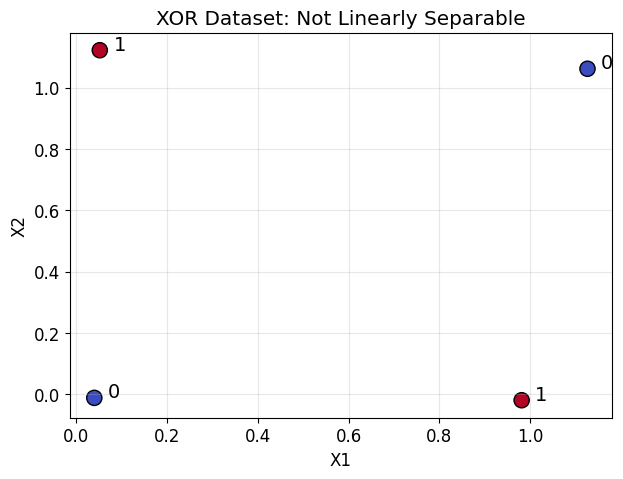

In [4]:
# Plot XOR data
plt.scatter(X_noisy[:,0], X_noisy[:,1], c=y, cmap='coolwarm', s=120, edgecolors='k')
for i, (x, label) in enumerate(zip(X_noisy, y)):
    plt.text(x[0]+0.03, x[1], str(label), fontsize=14, color='black')
plt.title('XOR Dataset: Not Linearly Separable')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True, alpha=0.3)
plt.show()

## 🏗️ Build a Two-Layer Neural Network

Now let's build a neural network with one hidden layer (two layers total). This is the simplest network that can solve XOR!

In [5]:
# Define a two-layer neural network (1 hidden layer, sigmoid activations)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def two_layer_predict(X, w1, w2, b1, w3, w4, b2, w_out, b_out):
    # Hidden layer
    h1 = sigmoid(w1 * X[:,0] + w2 * X[:,1] + b1)
    h2 = sigmoid(w3 * X[:,0] + w4 * X[:,1] + b2)
    # Output layer
    z_out = w_out[0] * h1 + w_out[1] * h2 + b_out
    return sigmoid(z_out)

# Example weights (these can solve XOR!)
w1, w2, b1 = 8, 8, -4
w3, w4, b2 = -8, -8, 12
w_out = np.array([8, 8])
b_out = -12

probs = two_layer_predict(X_noisy, w1, w2, b1, w3, w4, b2, w_out, b_out)
preds = (probs > 0.5).astype(int)
print("Predictions:", preds)
print("True labels:", y)
print("Correct?", np.array_equal(preds, y))

Predictions: [0 1 1 0]
True labels: [0 1 1 0]
Correct? True


## 🖼️ Visualize the Two-Layer Network's Decision Boundary

Let's see how the two-layer network separates the XOR data. The boundary will be non-linear!

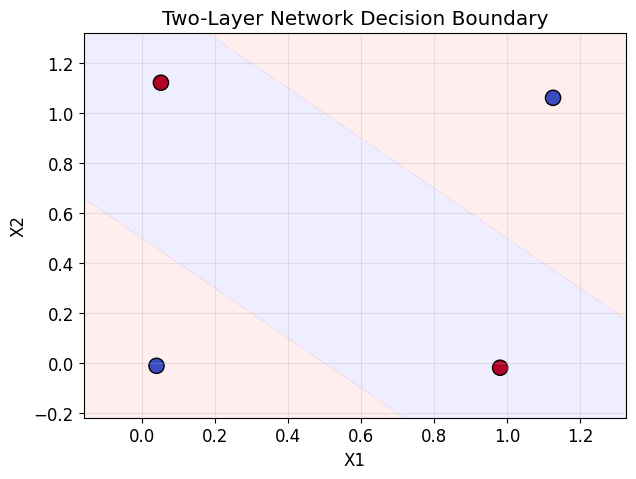

In [6]:
# Plot decision boundary for two-layer network

def plot_two_layer_decision_boundary(w1, w2, b1, w3, w4, b2, w_out, b_out):
    # Create a grid of points
    x_min, x_max = X_noisy[:,0].min()-0.2, X_noisy[:,0].max()+0.2
    y_min, y_max = X_noisy[:,1].min()-0.2, X_noisy[:,1].max()+0.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = two_layer_predict(grid, w1, w2, b1, w3, w4, b2, w_out, b_out)
    zz = zz.reshape(xx.shape)
    # Plot
    plt.contourf(xx, yy, zz, levels=[0,0.5,1], alpha=0.2, colors=['#FFAAAA','#AAAAFF'])
    plt.scatter(X_noisy[:,0], X_noisy[:,1], c=y, cmap='coolwarm', s=120, edgecolors='k')
    plt.title('Two-Layer Network Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True, alpha=0.3)
    plt.show()

plot_two_layer_decision_boundary(w1, w2, b1, w3, w4, b2, w_out, b_out)

## 🧪 Experiment: Adjust Hidden Layer Weights

Use the sliders below to change the hidden layer's weights and biases. See how the decision boundary changes—and try to break or fix the network!

In [ ]:
w1_slider = widgets.FloatSlider(value=8, min=-15, max=15, step=0.1, description='w1')
w2_slider = widgets.FloatSlider(value=8, min=-15, max=15, step=0.1, description='w2')
b1_slider = widgets.FloatSlider(value=-4, min=-15, max=15, step=0.1, description='b1')
w3_slider = widgets.FloatSlider(value=-8, min=-15, max=15, step=0.1, description='w3')
w4_slider = widgets.FloatSlider(value=-8, min=-15, max=15, step=0.1, description='w4')
b2_slider = widgets.FloatSlider(value=12, min=-15, max=15, step=0.1, description='b2')
wout1_slider = widgets.FloatSlider(value=8, min=-15, max=15, step=0.1, description='w_out1')
wout2_slider = widgets.FloatSlider(value=8, min=-15, max=15, step=0.1, description='w_out2')
bout_slider = widgets.FloatSlider(value=-12, min=-15, max=15, step=0.1, description='b_out')

ui = widgets.VBox([
    widgets.HBox([w1_slider, w2_slider, b1_slider]),
    widgets.HBox([w3_slider, w4_slider, b2_slider]),
    widgets.HBox([wout1_slider, wout2_slider, bout_slider])
])

def interactive_two_layer_plot(w1, w2, b1, w3, w4, b2, w_out1, w_out2, b_out):
    w_out = np.array([w_out1, w_out2])
    plot_two_layer_decision_boundary(w1, w2, b1, w3, w4, b2, w_out, b_out)
    probs = two_layer_predict(X_noisy, w1, w2, b1, w3, w4, b2, w_out, b_out)
    preds = (probs > 0.5).astype(int)
    print("Predictions:", preds)
    print("True labels:", y)
    print("Correct?", np.array_equal(preds, y))

out = widgets.interactive_output(interactive_two_layer_plot, {
    'w1': w1_slider, 'w2': w2_slider, 'b1': b1_slider,
    'w3': w3_slider, 'w4': w4_slider, 'b2': b2_slider,
    'w_out1': wout1_slider, 'w_out2': wout2_slider, 'b_out': bout_slider
})
display(ui, out)

Output()

## 🎮 Practice: Tune the Network to Solve XOR

- Can you find weights and biases that make the network solve the XOR problem?
- Try breaking the network—what happens to the decision boundary?

**Aha!** With two layers, you can solve problems that are impossible for a single neuron. This is the magic of deep learning!

## 🌉 Bridge to the Next Lesson

In the next lesson, you'll learn how to train these networks automatically using backpropagation—the secret sauce behind modern AI. Get ready to unlock the next level of neural network mastery!